In [76]:
import chess.pgn
import numpy as np
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import copy

import pandas as pd
from matplotlib.pyplot import figure

In [2]:
lookup_fen = {
    'p': np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=bool),
    'n': np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=bool),
    'b': np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=bool),
    'r': np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=bool),
    'q': np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=bool),
    'k': np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=bool),
    'P': np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=bool),
    'N': np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=bool),
    'B': np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=bool),
    'R': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=bool),
    'Q': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=bool),
    'K': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=bool),
}

lookup_hot = {tuple(value): key for key, value in lookup_fen.items()}
lookup_hot[tuple([False for _ in range(12)])] =  None

def piecetovec(piece):
    return lookup_fen.get(piece, None)

def vectopiece(vec):
    return lookup_hot[tuple(vec)]

def fentohot(fen):
    iter = 0
    onehotboard = np.zeros((64, 12), dtype=bool)
    for p in fen:
        if p == ' ':
            break
        if p == '/':
            continue
        encoding = piecetovec(p)
        if encoding is not None:
            onehotboard[iter, :] = encoding
            iter = iter + 1
        else:
            iter = iter + int(p)

    return onehotboard

def hottofen(onehot):
    jter = 0
    fenboard = ''
    for iter in range(64):
        if iter % 8 == 0 and iter > 0:
            if jter > 0:
                fenboard += str(jter)
                jter = 0

            fenboard += '/'

        key = vectopiece(hot[iter, :])

        if key is not None:
            if not jter == 0:
                fenboard += str(jter)
                jter = 0

            fenboard += key
        else:
            jter += 1

    if not jter == 0:
        fenboard += str(jter)
        jter = 0
    
    return fenboard

In [3]:
piece_lookup = {'p': 0, 'n': 1, 'b': 2, 'r': 3, 'q': 4, 'k': 5, 'P': 6, 'N': 7, 'B': 8, 'R': 9, 'Q': 10, 'K': 11}
file_lookup = {'a': 7, 'b': 6, 'c': 5, 'd': 4, 'e': 3, 'f': 2, 'g': 1, 'h': 0}

def index_of(piece, file, rank):
    board_offset = rank*8 + file_lookup[file]
    piece_offset = piece_lookup[piece]
    return (64-board_offset)*12 - (12 - piece_offset)

In [20]:
positions = np.zeros((768, 100000), dtype=bool)
iter = 0

for jter in range(920, 980):
    print(jter)
    pgn = open(f'twic{jter}.pgn')
    
    while True:
        try:
            game = chess.pgn.read_game(pgn)
        except UnicodeDecodeError:
            print('Cannot decode game')
            continue
        
        if game is None:
            break

        board = game.board()
        for move in game.mainline_moves():
            board.push(move)
            hot = fentohot(board.fen()).reshape((768,))
            positions[:,iter] = hot
            iter = iter + 1
            if iter == positions.shape[1]:
                positions = np.pad(positions, ((0, 0),(0, 10000)), 'constant', constant_values=(None, 0))

positions = positions[:, 0:iter]

933
Cannot decode game


error during pgn parsing
Traceback (most recent call last):
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1651, in read_game
    move = visitor.parse_san(board_stack[-1], token)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1032, in parse_san
    return board.parse_san(san)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/__init__.py", line 2991, in parse_san
    raise ValueError(f"illegal san: {san!r} in {self.fen()}")
ValueError: illegal san: 'axb5' in rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1


Cannot decode game
Cannot decode game
934
Cannot decode game


error during pgn parsing
Traceback (most recent call last):
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1651, in read_game
    move = visitor.parse_san(board_stack[-1], token)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1032, in parse_san
    return board.parse_san(san)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/__init__.py", line 2991, in parse_san
    raise ValueError(f"illegal san: {san!r} in {self.fen()}")
ValueError: illegal san: 'd8' in rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1


Cannot decode game
Cannot decode game
Cannot decode game


error during pgn parsing
Traceback (most recent call last):
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1651, in read_game
    move = visitor.parse_san(board_stack[-1], token)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1032, in parse_san
    return board.parse_san(san)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/__init__.py", line 2991, in parse_san
    raise ValueError(f"illegal san: {san!r} in {self.fen()}")
ValueError: illegal san: 'hxg5' in rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1
error during pgn parsing
Traceback (most recent call last):
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1651, in read_game
    move = visitor.parse_san(board_stack[-1], token)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1032, in par

Cannot decode game
Cannot decode game
Cannot decode game
Cannot decode game
Cannot decode game
Cannot decode game
Cannot decode game
Cannot decode game
Cannot decode game
Cannot decode game


error during pgn parsing
Traceback (most recent call last):
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1651, in read_game
    move = visitor.parse_san(board_stack[-1], token)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1032, in parse_san
    return board.parse_san(san)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/__init__.py", line 2991, in parse_san
    raise ValueError(f"illegal san: {san!r} in {self.fen()}")
ValueError: illegal san: 'Kf7' in rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1
error during pgn parsing
Traceback (most recent call last):
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1651, in read_game
    move = visitor.parse_san(board_stack[-1], token)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1032, in pars

Cannot decode game
Cannot decode game
Cannot decode game
Cannot decode game


error during pgn parsing
Traceback (most recent call last):
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1651, in read_game
    move = visitor.parse_san(board_stack[-1], token)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1032, in parse_san
    return board.parse_san(san)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/__init__.py", line 2991, in parse_san
    raise ValueError(f"illegal san: {san!r} in {self.fen()}")
ValueError: illegal san: 'Rfd8' in rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1


Cannot decode game
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
Cannot decode game
961
962
963
964
965
966


error during pgn parsing
Traceback (most recent call last):
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1651, in read_game
    move = visitor.parse_san(board_stack[-1], token)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1032, in parse_san
    return board.parse_san(san)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/__init__.py", line 2991, in parse_san
    raise ValueError(f"illegal san: {san!r} in {self.fen()}")
ValueError: illegal san: 'Nbd7' in rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1


967
968
969
970


error during pgn parsing
Traceback (most recent call last):
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1651, in read_game
    move = visitor.parse_san(board_stack[-1], token)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1032, in parse_san
    return board.parse_san(san)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/__init__.py", line 2991, in parse_san
    raise ValueError(f"illegal san: {san!r} in {self.fen()}")
ValueError: illegal san: 'b1' in 8/6qk/8/5KPp/1Q3p2/4P1P1/1p6/8 b - - 1 69


971
972
973
974
975
976
977
978
979


error during pgn parsing
Traceback (most recent call last):
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1651, in read_game
    move = visitor.parse_san(board_stack[-1], token)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1032, in parse_san
    return board.parse_san(san)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/__init__.py", line 2991, in parse_san
    raise ValueError(f"illegal san: {san!r} in {self.fen()}")
ValueError: illegal san: 'Bxc1' in rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1
error during pgn parsing
Traceback (most recent call last):
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1651, in read_game
    move = visitor.parse_san(board_stack[-1], token)
  File "/Users/andrewmatteson/anaconda3/envs/chess/lib/python3.9/site-packages/chess/pgn.py", line 1032, in par

Cannot decode game
Cannot decode game
Cannot decode game


In [23]:
iter

14623117

In [24]:
flat_prob = np.mean(positions, (1,))
flat_sum = np.sum(positions, (1,))
positionprob = np.mean(positions, (1,)).reshape(64,12)

In [25]:
piece = ['p', 'n', 'b', 'r', 'q', 'k', 'P', 'N', 'B', 'R', 'Q', 'K']*8*8
file = [r for _ in range(8) for r in 'abcdefgh' for _ in range(12) ]
rank = [f for f in range(8) for _ in range(12) for _ in range(8) ]

index = [index_of(p, f, r) for (p, f, r) in zip(piece, file, rank)]
probability = [flat_prob[ind] for ind in index]
count = [flat_sum[ind] for ind in index]

df = pd.DataFrame.from_dict({
    'piece': piece,
    'file': file,
    'rank': [r+1 for r in rank],
    'index': index,
    'probability': probability,
    'count': count})

In [29]:
pd.set_option('display.max_rows', 768)
df = df.sort_values(by='probability')

df

,piece,file,rank,index,probability,count
0,p,a,1,672,0.000000,0
36,p,d,1,708,0.000000,0
726,P,e,8,54,0.000000,0
708,p,d,8,36,0.000000,0
12,p,b,1,684,0.000000,0
714,P,d,8,42,0.000000,0
720,p,e,8,48,0.000000,0
738,P,f,8,66,0.000000,0
732,p,f,8,60,0.000000,0
6,P,a,1,678,0.000000,0


In [30]:
df.to_csv('./positions.csv')

Text(0.5, 1.0, 'Histogram of Piece-Position Probabilities')

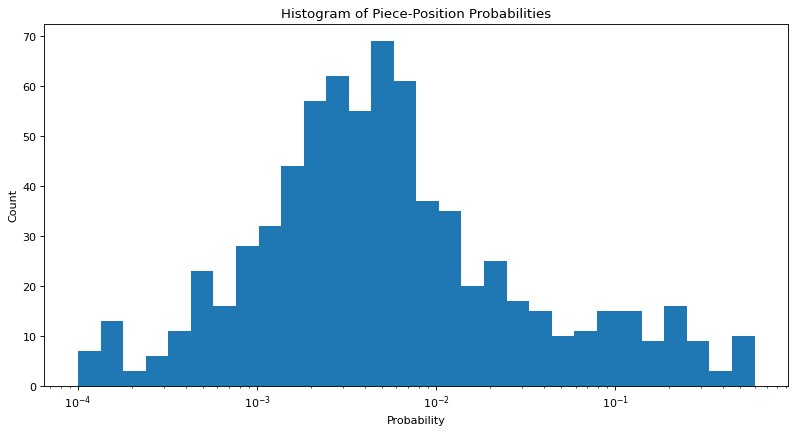

In [34]:
x = positionprob.flatten()
hist, bins = np.histogram(x, bins=30)
logbins = np.logspace(np.log10(1e-4), np.log10(.60), len(bins))
plt.hist(x, bins=logbins)
plt.xscale('log')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.title('Histogram of Piece-Position Probabilities')

In [36]:
piece_lookup = {'p': 0, 'n': 1, 'b': 2, 'r': 3, 'q': 4, 'k': 5, 'P': 6, 'N': 7, 'B': 8, 'R': 9, 'Q': 10, 'K': 11}
file_lookup = {'a': 7, 'b': 6, 'c': 5, 'd': 4, 'e': 3, 'f': 2, 'g': 1, 'h': 0}

def index_of(piece, file, rank):
    board_offset = rank*8 + file_lookup[file]
    piece_offset = piece_lookup[piece]
    return (64-board_offset)*12 - (12 - piece_offset)

<ipython-input-75-c4ab2f563276>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])


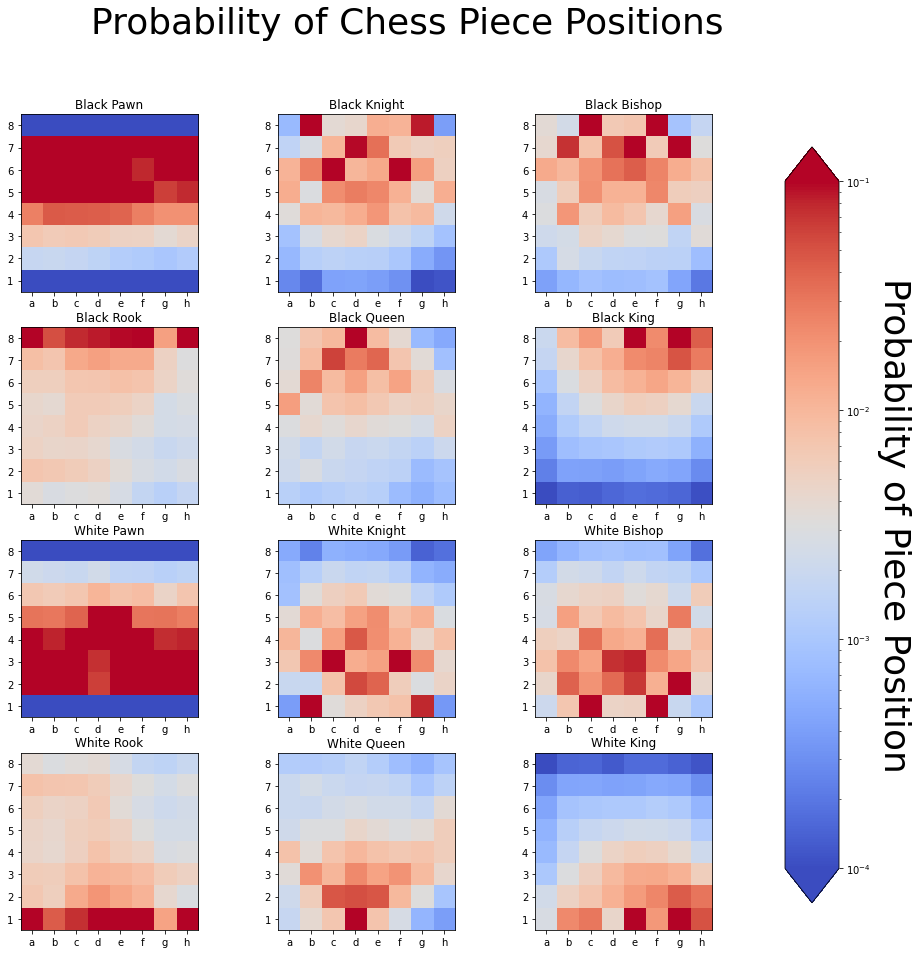

In [75]:
title_lookup = {'p': 'Pawn', 'n': 'Knight', 'b': 'Bishop', 'r': 'Rook', 'q': 'Queen', 'k': 'King'}


file_tick = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
rank_tick = range(8,0,-1)

norm = colors.LogNorm(vmin=1e-4, vmax=1e-1) 
cmap = copy.copy(matplotlib.cm.get_cmap('coolwarm'))
cmap.set_bad(cmap(0))

fig, ax = plt.subplots(4,3)
fig.set_figheight(15)
fig.set_figwidth(15)

iter = 0
for key in piece_lookup:
    this_ax = ax[np.unravel_index(iter, (4,3))]
    iter = iter+1
    
    color = 'Black' if (key.islower()) else 'White'
    
    title = color + ' ' + title_lookup[key.lower()]
    
    to_show = positionprob[:,piece_lookup[key]].reshape(8,8)

    im = this_ax.imshow(to_show, cmap=cmap, norm=norm)
    this_ax.set_xticks(np.arange(len(file_tick)))
    this_ax.set_yticks(np.arange(len(rank_tick)))
    this_ax.set_xticklabels(file_tick)
    this_ax.set_yticklabels(rank_tick)
    
    this_ax.set_title(title)

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

cbar = fig.colorbar(im, cax=cbar_ax, extend='both')
cbar.set_label('Probability of Piece Position', rotation=270, fontsize=36, labelpad=40)
cbar.minorticks_on()

fig.suptitle('Probability of Chess Piece Positions', fontsize=36)

plt.show()

In [38]:
positionprob

array([[0.00000000e+00, 7.22144260e-04, 3.67575531e-03, 4.72189137e-01,
        3.22933886e-03, 2.01666991e-03, 0.00000000e+00, 5.07005449e-04,
        4.41219201e-04, 3.72608658e-03, 1.21731913e-03, 1.01961846e-04],
       [0.00000000e+00, 1.66119440e-01, 2.47389117e-03, 5.14951771e-02,
        7.25064294e-03, 8.83498368e-03, 0.00000000e+00, 2.43586918e-04,
        6.54443235e-04, 2.99279559e-03, 1.16992841e-03, 1.49284178e-04],
       [0.00000000e+00, 3.75986871e-03, 2.81677839e-01, 7.75221179e-02,
        9.79223513e-03, 1.75208883e-02, 0.00000000e+00, 5.81613345e-04,
        8.57409539e-04, 3.38060620e-03, 1.27428372e-03, 1.53592425e-04],
       [0.00000000e+00, 4.25627450e-03, 6.45683133e-03, 8.51785567e-02,
        3.09511303e-01, 6.17563273e-03, 0.00000000e+00, 5.40650807e-04,
        9.26273106e-04, 3.61974810e-03, 1.63624486e-03, 1.24255314e-04],
       [0.00000000e+00, 1.18680580e-02, 7.13849175e-03, 9.62804989e-02,
        8.81693007e-03, 2.50630355e-01, 0.00000000e+00, 5.03

In [53]:
1 if False else 2

2

In [55]:
'a'.islower()

True